try to read tif file and count how many crop rotation types there is. the first crop type will be utilized. 


In [1]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
from PIL import Image
im1 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2012_c.tif')
im2 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2013_c.tif')
im3 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2014_c.tif')
im4 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2015_c.tif')
im5 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2016_c.tif')
im6 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2017_c.tif')
im7 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2018_c.tif')
im8 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/lu2019_c.tif')


In [4]:
from collections import Counter
def constanttest(array):
  freq = Counter(array).most_common(1)
  count = 0
  return freq
[(a, b)] = constanttest([2,3,3,3,3,3,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.1,2,2.2,2.2])
print(a, b)

4.1 8


In [5]:
import pandas as pd
lookup = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/baseline_lookup.csv')


In [6]:
print(lookup.loc[lookup['landuse'] == 'CORN'])
lookup.loc[lookup['landuse'] == 'WETN']

     value landuse
1        1    CORN
34      44    CORN
110    228    CORN
123    241    CORN


,value,landuse
85,195,WETN


In [42]:
import numpy as np
[col,row] = np.array(im1).shape
ay = np.zeros([9,col,row])
ay[0] = np.array(im1)
ay[1] = np.array(im2)
ay[2] = np.array(im3)
ay[3] = np.array(im4)
ay[4] = np.array(im5)
ay[5] = np.array(im6)
ay[6] = np.array(im7)
ay[7] = np.array(im8)


Identify pixels that is constant

In [43]:
LU = ay[7].astype(np.int64)
un2 = np.zeros(ay[0].shape)
co2 = np.zeros(ay[0].shape)
rotalist = []
croprota = []
cons_land = []
for colnumber in range(len(ay[0,:,0])):
  for rownumber in range(len(ay[0,0,:])):
     
    [(un2[colnumber, rownumber],co2[colnumber, rownumber])] = constanttest(ay[0:8, colnumber, rownumber])
    if co2[colnumber, rownumber] > 6:
      LU[colnumber, rownumber] = un2[colnumber, rownumber]
      if un2[colnumber, rownumber] != 0:
        cons_land.append([colnumber, rownumber])
      # give all corn or soybean as tillage no winter cover
      
    else:
      rotalist.append([colnumber, rownumber])
      croprota.append(ay[0:8, colnumber, rownumber])
    if LU[colnumber, rownumber] == 1:
       LU[colnumber, rownumber] = 1001
    elif LU[colnumber, rownumber] == 5:
       LU[colnumber, rownumber] = 5001
un3, co3 = np.unique(croprota, return_counts = True, axis = 0)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:4.0f}'.format}, linewidth=200)
numcount = 259
print(un3[co3>numcount])
print(co3[co3>numcount])
print("rotation num:", len(un3),", pixel num:",sum(co3))
print("major rotation num:", len(un3[co3>numcount]),", pixel num:", sum(co3[co3>numcount]))


[[   1    1    1    1    1    5    1    5]
 [   1    1    1    1    5    1    5    1]
 [   1    1    1    5    1    1    5    1]
 [   1    1    1    5    1    5    1    5]
 [   1    1    5    1    1    1    5    1]
 [   1    1    5    1    1    5    1    1]
 [   1    1    5    1    1    5    1    5]
 [   1    1    5    1    5    1    1    1]
 [   1    1    5    1    5    1    5    1]
 [   1    5    1    1    1    5    1    1]
 [   1    5    1    1    5    1    1    1]
 [   1    5    1    1    5    1    1    5]
 [   1    5    1    1    5    1    1   53]
 [   1    5    1    1    5    1    5    1]
 [   1    5    1    5    1    1    5    1]
 [   1    5    1    5    1    5    1    1]
 [   1    5    1    5    1    5    1    5]
 [   1    5   24    1    5    1    5    1]
 [   1   24    1    5    1    1    5    1]
 [   5    1    1    1    1    5    1    1]
 [   5    1    1    5    1    1    5    1]
 [   5    1    5    1    1    5    1    1]
 [   5    1    5    1    1    5    1    5]
 [   5    1

In [44]:
len(cons_land)*31.2*31.2/1000000
260*31.2*31.2/1000000
print(len(croprota),len(rotalist), 15400*31*31/1000000)

69087 69087 14.7994


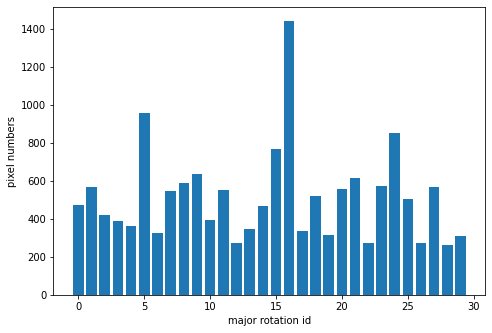

In [45]:
import matplotlib.pyplot as plt
numcount = 259
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
students = co3[co3>numcount].flatten()
langs = range(len(students))

ax.bar(langs,students)
plt.xlabel('major rotation id')
plt.ylabel('pixel numbers')
plt.show()

In [46]:
co3.flatten()

array([2, 5, 5, ..., 1, 1, 1])

Check the major rotation types


In [47]:
dfuni = pd.DataFrame(un3[co3>numcount], columns = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])


result = dfuni.replace(dict(zip(lookup.value, lookup.landuse)))
result['pixeln'] = co3[co3>numcount]
result = result.sort_values(by=['pixeln'], ascending=False)
result
# x = np.asarray(df3.merge(lookup).landuse)

,2012,2013,2014,2015,2016,2017,2018,2019,pixeln
16,CORN,SOYB,CORN,SOYB,CORN,SOYB,CORN,SOYB,1445
5,CORN,CORN,SOYB,CORN,CORN,SOYB,CORN,CORN,956
24,SOYB,CORN,SOYB,CORN,SOYB,CORN,SOYB,CORN,850
15,CORN,SOYB,CORN,SOYB,CORN,SOYB,CORN,CORN,768
9,CORN,SOYB,CORN,CORN,CORN,SOYB,CORN,CORN,634
21,SOYB,CORN,SOYB,CORN,CORN,SOYB,CORN,CORN,615
8,CORN,CORN,SOYB,CORN,SOYB,CORN,SOYB,CORN,588
23,SOYB,CORN,SOYB,CORN,SOYB,CORN,CORN,SOYB,572
27,WWHT,CORN,CORN,CORN,SOYB,CORN,CORN,SOYB,570
1,CORN,CORN,CORN,CORN,SOYB,CORN,SOYB,CORN,566


Seems like the corn-soybean rotation continue until the 90th rotation. in that case, using the most frequent crop type is not appropriate for the current situation. Maybe still try the most recent data for this situation. Which is the same as the dairy rotation map.

So, if the land is under rotation, this program gives the land for the most recent land. If the land is relatively more consistant (like 6 years of the land is the same type), giving the land for this consistant land.

This dataset can be extend to more land use rotation types but it is not appropriate for all detailed information. If the HRU definition doesn't have limitation, it will be possible to deal with the detailed situation. 



Let's only consider the top 30 crop rotations and assign the rest pixel to the most recent data

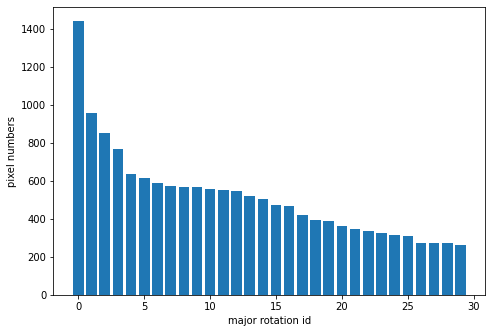

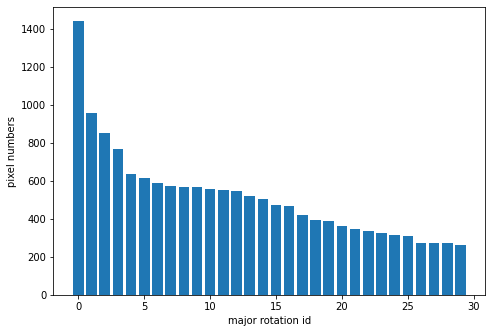

In [48]:
import matplotlib.pyplot as plt
numcount = 259
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sortedcount = np.asarray(result['pixeln'])
students = sortedcount.flatten()
langs = range(len(students))

ax.bar(langs,students)
plt.xlabel('major rotation id')
plt.ylabel('pixel numbers')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sortedcount = np.asarray(result['pixeln'][0:30])
students = sortedcount.flatten()
langs = range(len(students))

ax.bar(langs,students)
plt.xlabel('major rotation id')
plt.ylabel('pixel numbers')
plt.show()

In [49]:
majorrota_list = un3[co3>numcount]
croprota1 = croprota
rotalist1 = rotalist
k = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(croprota1)):
  for j in range(30):
    if (croprota1[i] == majorrota_list[j]).all():
      [col_crota,row_crota] = rotalist1[i]
      LU[col_crota, row_crota] = 600+j
      k[j] = k[j]+1

np.amax(LU)



5001

In [50]:
for col1 in range(len(LU[:,0])):
  for row1 in range(len(LU[0,:])):
    if LU[col1, row1] == 1:
      print(1)
    elif LU[col1, row1] == 5:
      print(5)

In [51]:
from osgeo import gdal

#1.    
tiff_file = gdal.Open('/content/gdrive/MyDrive/Colab Notebooks/lu2019_c.tif')
#2.
geotransform = tiff_file.GetGeoTransform()
projection = tiff_file.GetProjection()
band = tiff_file.GetRasterBand(1)    
xsize = band.XSize
ysize = band.YSize

#5.
driver = gdal.GetDriverByName('GTiff')
new_tiff = driver.Create('/content/gdrive/MyDrive/Colab Notebooks/rotationCrop.tif',xsize,ysize,1,gdal.GDT_Float64)
new_tiff.SetGeoTransform(geotransform)
new_tiff.SetProjection(projection)
new_tiff.GetRasterBand(1).WriteArray(LU)
new_tiff.FlushCache() #Saves to disk 
new_tiff = None #closes the file

## Write Operation Schedule

In [17]:
pidchecktable = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/OperationSchedule.csv')
a = pidchecktable.loc[pidchecktable['CPNM'] == 'SOYB','ICNUM'].values[0]
print(a)

56


In [18]:
# define the rotation needed functions


def plant(data, sid, crop, year, optnum):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['CROP'] = [crop]
  df['YEAR'] = [year]
  df['MGT_OP'] = [1] # plant
  pid = pidchecktable.loc[pidchecktable['CPNM'] == crop,'ICNUM'].values[0]
  if crop == 'CORN':
    heatunit = 2200 
    # May 15 to Oct 13
    # May 1 to September 30, 2200, so 2200 
    #  fit with https://agrigold.com/agronomy/crop-growth-development/heat-units-and-corn-maturity/ 
    pid = 19
    df['MONTH'] = [5]
    df['DAY'] = [15]
  elif crop == 'SOYB':
    heatunit = 2153
    # May 15 to Oct 7
    # 2200 - 6.8*7 = 2153
    pid = 56
    df['MONTH'] = [5]
    df['DAY'] = [15]
  elif crop == 'SCRN':
    heatunit = 2200
    df['MONTH'] = [5]
    df['DAY'] = [15]    
    # May 15 to Oct 13
    # use the same date as corn grain
  elif crop == 'PEAS':
    heatunit = 733
    df['MONTH'] = [5]
    df['DAY'] = [20]
    # May 20 to July 15
    # 2200/3=733
  else:# RYE/WWHT
    heatunit = 1800
    df['MONTH'] = [10]
    df['DAY'] = [14]
  df['HEATUNITS'] = heatunit
  df['PLANT_ID'] = [pid]
  df['WSTRS_ID'] = [1]
  df['AFERT_ID'] = [1]
  df['CFRT_ID'] = [1]
  df['CPST_ID'] = [1]
  df['OP_NUM'] = [optnum]
  return data.append(df)

# FERTILIZER FOR corn or soybeans
def fert(data, sid, crop, year, optnum):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['YEAR'] = [year]
  df['MONTH'] = [5]
  df['DAY'] = [15]
  df['MGT_OP'] = [3] # FERTILIZER APPLICATION
  df['FERT_ID'] = [27]
  if crop == 'CORN':
    kg = 98.9
  elif crop == 'SCRN':
    kg = 49.5
  elif crop == 'WWHT':
    kg = 98.9
    df['MONTH'] = [10]
    df['DAY'] = [15]
  elif crop == 'PEAS':
    df['MONTH'] = [5]
    df['DAY'] = [21]
    kg = 49.5
  else:#soybean
    kg = 65.9
  df['FRT_KG'] = [kg]
  df['FRT_SURFACE'] = [0.8]
  df['WSTRS_ID'] = [1]
  df['AFERT_ID'] = [1]
  df['CFRT_ID'] = [1]
  df['CPST_ID'] = [1]
  df['OP_NUM'] = [optnum] 
  return data.append(df)

#tillage function for corn, soybean and winter wheat
def tillage(data, sid, year, optnumber):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['YEAR'] = [year]
  df['MONTH'] = [10]
  df['DAY'] = [14]
  df['MGT_OP'] = [6] # tillage
  df['TILLAGE_ID'] = [58] # chisel plow
  df['WSTRS_ID'] = [1]
  df['AFERT_ID'] = [1]
  df['CFRT_ID'] = [1]
  df['CPST_ID'] = [1]
  df['OP_NUM'] = [optnumber]
  return data.append(df)
def tillagepea(data, sid, year, optnumber):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['YEAR'] = [year]
  df['MONTH'] = [5]
  df['DAY'] = [19]
  df['MGT_OP'] = [6] # tillage
  df['TILLAGE_ID'] = [6] # field cultivator Ge15ft (Baugart's report 
# and https://dnr.wi.gov/topic/TMDLs/documents/UFW/UFWBSWATReport20180426.pdf)
  df['WSTRS_ID'] = [1]
  df['AFERT_ID'] = [1]
  df['CFRT_ID'] = [1]
  df['CPST_ID'] = [1]
  df['OP_NUM'] = [optnumber]
  return data.append(df)


def harvest(data, sid, crop, year, optnum):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['CROP'] = [crop]
  df['YEAR'] = [year]
  if crop == 'CORN':
    # May 15 to Oct 13
    df['MONTH'] = [10]
    df['DAY'] = [13]
  elif crop == 'SOYB':
    # May 15 to Oct 7
    df['MONTH'] = [10]
    df['DAY'] = [7]
  elif crop == 'CSIL':
    df['MONTH'] = [9]
    df['DAY'] = [20]    
    # May 15 to Sep 20
  elif crop == 'PEAS':
    df['MONTH'] = [7]
    df['DAY'] = [15]
    # May 20 to July 15
  else: # winter wheat
    df['MONTH'] = [7]
    df['DAY'] = [26]
  df['MGT_OP'] = [5] # harvest
  df['WSTRS_ID'] = [1]
  df['AFERT_ID'] = [1]
  df['CFRT_ID'] = [1]
  df['CPST_ID'] = [1]
  df['OP_NUM'] = [optnum]
  return data.append(df)

In [19]:
def cornsoybtillyear(data, crop, sid, year):
  data = plant(data, sid, crop, year, 1)
  data = fert(data, sid, crop, year, 2)
  data = harvest(data, sid, crop, year, 3)
  data = tillage(data, sid, year, 4)
  optnum = 5
  return data, optnum
def cornsoybnotillyear(data, crop, sid, year):
  data = plant(data, sid, crop, year, 1)
  data = fert(data, sid, crop, year, 2)
  data = harvest(data, sid, crop, year, 3)
  optnum = 4
  return data
def cornsoybnotillwwcoveryear(data, crop, sid, year):
  data = plant(data, sid, crop, year, 1)
  data = fert(data, sid, crop, year, 2)
  data = harvest(data, sid, crop, year, 3)
  data = plant(data, sid, 'WWHT', year, 4)
  return data
def cornsoybnotillryecoveryear(data, crop, sid, year):
  data = plant(data, sid, crop, year, 1)
  data = fert(data, sid, crop, year, 2)
  data = harvest(data, sid, crop, year, 3)
  data = plant(data, sid, 'RYE', year, 4)
  return data
def winterwheattillyear(data, crop, sid, year, optnum):
  data = plant(data, sid, crop, year - 1, optnum)
  data = harvest(data, sid, crop, year, 1)
  data = fert(data, sid, crop, year, 2)
  data = tillage(data, sid, year, 3)
  return data
def winterwheatnotillyear(data, crop, sid, year):
  data = harvest(data, sid, crop, year, 1)
  data = fert(data, sid, crop, year, 2)
  data = plant(data, sid, crop, year, 3)
  return data

def peasyear(data, crop, sid, year):
  data = tillagepea(data, sid, year, 1)
  data = plant(data, sid, crop, year, 2)
  data = fert(data, sid, crop, year, 3)
  data = harvest(data, sid, crop, year, 4)
  optnum = 5
  return data, optnum


# write the cornsoybyear (corn, soybean, output with optnum);
# winterwheatyear, peasyear (output with optnum)

Use the predefined functions: cornsoybtillyear, cornsoybnotillyear, cornsoybnotillwwcoveryear, cornsoybnotillryecoveryear, winterwheattillyear, winterwheatnotillyear, peasyear

In [21]:
# set a array for record
import pandas as pd
data = pd.DataFrame(columns = ['SID','SUBBASIN','HRU','LANDUSE','SOIL',
                             'SLOPE_CD','CROP','YEAR','MONTH','DAY',
                             'HUSC','MGT_OP','HEATUNITS','PLANT_ID',
                             'CURYR_MAT','LAI_INIT','BIO_INIT','HI_TARG',
                             'BIO_TARG','CNOP','IRR_AMT','FERT_ID','FRT_KG',
                             'FRT_SURFACE','PEST_ID','PST_KG','TILLAGE_ID',
                             'HARVEFF','HI_OVR','GRZ_DAYS','MANURE_ID',
                             'BIO_EAT','BIO_TRMP','MANURE_KG','WSTRS_ID',
                             'AUTO_WSTRS','AFERT_ID','AUTO_NSTRS','AUTO_NAPP',
                             'AUTO_NYR','AUTO_EFF','AFRT_SURFACE','SWEEPEFF',
                             'FR_CURB','IMP_TRIG','FERT_DAYS','CFRT_ID',
                             'IFRT_FREQ','CFRT_KG','PST_DEP','IHV_GBM',
                             'IRR_SALT','IRR_EFM','IRR_SQ','IRR_EFF','IRR_MX',
                             'IRR_ASQ','CPST_ID','PEST_DAYS','IPEST_FREQ',
                             'CPST_KG','BURN_FRLB','OP_NUM','IRR_SC','IRR_NO',
                             'IRR_SCA','IRR_NOA'])
print(data)

majorrota_crop = pd.DataFrame(majorrota_list, columns = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
majorrota_crop = majorrota_crop.replace(dict(zip(lookup.value, lookup.landuse)))
sidcroproation = [ 'CR16','CR10','CR18','CR20','CR21','CRT2','CR24','CR13',
                   'CRT7','CRT5','CR19','CR12','CR27','CR22','CR17','CRT4','CRT1',
                   'CR23','CR14','CR25','CR11','CRT6','CR28','CRT8','CRT3','CR15',
                   'CR29','CRT9','CR30','CR26']
                  # crop rotation 1 to 30 in document
# rearrange the year number to start from warmup period
warmupinclude = ['2018', '2019', '2012', '2013', '2014', '2015', '2016', '2017']
cornsoyb = ['CORN', 'SOYB', 'SCRN']
notillyear = ['CRT1', 'CRT2', 'CRT3', 'CRT4', 'CRT5', 'CRT6', 'CRT7', 'CRT8', 
              'CR10', 'CR11', 'CR12', 'CR13', 'CR16', 'CR17', 
              'CR18', 'CR19', 'CR20', 'CR21', 'CR22']
# NOTE THAT RYE COVER rotation IS CR17
wwhtcoverrota = ['CR9', 'CR14', 'CR15']
optnum = 0
for j in range(30):
  optyear = 0
  # start from the first year of the warmup period 2018
  for year_column in warmupinclude:
    optyear = optyear + 1
    croptype = majorrota_crop.iloc[[j]][year_column].values[0]
    sid = sidcroproation[j]
    if sid == 'CR17': # rye cover, no till
      data = cornsoybnotillryecoveryear(data, croptype, sid, optyear)
      continue
    if sid in wwhtcoverrota: # winter wheat, no till
      if croptype in cornsoyb:
        data = cornsoybnotillwwcoveryear(data, croptype, sid, optyear)
      else: #wwht
        data = winterwheatnotillyear(data, croptype, sid, optyear)
      continue
    if sid in notillyear: # no till, all soyb or corn
      data = cornsoybnotillyear(data, croptype, sid, optyear)
    else: # till year
      # for year has corn, sweetcorn or soybean
      if croptype in cornsoyb:
        data, optnum = cornsoybtillyear(data, croptype, sid, optyear)
      elif croptype == 'PEAS':
        data, optnum = peasyear(data, croptype, sid, optyear)
      elif croptype == 'WWHT':
        data = winterwheattillyear(data, croptype, sid, optyear, optnum)
data, OPTnouse = cornsoybtillyear(data, 'CORN', 'CRN2', 1)
data, OPTnouse = cornsoybtillyear(data, 'SOYB', 'SYB2', 1)

Empty DataFrame
Columns: [SID, SUBBASIN, HRU, LANDUSE, SOIL, SLOPE_CD, CROP, YEAR, MONTH, DAY, HUSC, MGT_OP, HEATUNITS, PLANT_ID, CURYR_MAT, LAI_INIT, BIO_INIT, HI_TARG, BIO_TARG, CNOP, IRR_AMT, FERT_ID, FRT_KG, FRT_SURFACE, PEST_ID, PST_KG, TILLAGE_ID, HARVEFF, HI_OVR, GRZ_DAYS, MANURE_ID, BIO_EAT, BIO_TRMP, MANURE_KG, WSTRS_ID, AUTO_WSTRS, AFERT_ID, AUTO_NSTRS, AUTO_NAPP, AUTO_NYR, AUTO_EFF, AFRT_SURFACE, SWEEPEFF, FR_CURB, IMP_TRIG, FERT_DAYS, CFRT_ID, IFRT_FREQ, CFRT_KG, PST_DEP, IHV_GBM, IRR_SALT, IRR_EFM, IRR_SQ, IRR_EFF, IRR_MX, IRR_ASQ, CPST_ID, PEST_DAYS, IPEST_FREQ, CPST_KG, BURN_FRLB, OP_NUM, IRR_SC, IRR_NO, IRR_SCA, IRR_NOA]
Index: []


In [22]:
# avoid the mgt1 table building can't find the corresponding field
fillnacolumn = ['HUSC','MGT_OP','HEATUNITS','PLANT_ID',
                             'CURYR_MAT','LAI_INIT','BIO_INIT','HI_TARG',
                             'BIO_TARG','CNOP','IRR_AMT','FERT_ID','FRT_KG',
                             'FRT_SURFACE','PEST_ID','PST_KG','TILLAGE_ID',
                             'HARVEFF','HI_OVR','GRZ_DAYS','MANURE_ID',
                             'BIO_EAT','BIO_TRMP','MANURE_KG','WSTRS_ID',
                             'AUTO_WSTRS','AFERT_ID','AUTO_NSTRS','AUTO_NAPP',
                             'AUTO_NYR','AUTO_EFF','AFRT_SURFACE','SWEEPEFF',
                             'FR_CURB','IMP_TRIG','FERT_DAYS','CFRT_ID',
                             'IFRT_FREQ','CFRT_KG','PST_DEP','IHV_GBM',
                             'IRR_SALT','IRR_EFM','IRR_SQ','IRR_EFF','IRR_MX',
                             'IRR_ASQ','CPST_ID','PEST_DAYS','IPEST_FREQ',
                             'CPST_KG','BURN_FRLB','OP_NUM','IRR_SC','IRR_NO',
                             'IRR_SCA','IRR_NOA'] 
for name in fillnacolumn:
  data[name] = data[name].fillna(0)
data

,SID,SUBBASIN,HRU,LANDUSE,SOIL,SLOPE_CD,CROP,YEAR,MONTH,DAY,HUSC,MGT_OP,HEATUNITS,PLANT_ID,CURYR_MAT,LAI_INIT,BIO_INIT,HI_TARG,BIO_TARG,CNOP,IRR_AMT,FERT_ID,FRT_KG,FRT_SURFACE,PEST_ID,PST_KG,TILLAGE_ID,HARVEFF,HI_OVR,GRZ_DAYS,MANURE_ID,BIO_EAT,BIO_TRMP,MANURE_KG,WSTRS_ID,AUTO_WSTRS,AFERT_ID,AUTO_NSTRS,AUTO_NAPP,AUTO_NYR,AUTO_EFF,AFRT_SURFACE,SWEEPEFF,FR_CURB,IMP_TRIG,FERT_DAYS,CFRT_ID,IFRT_FREQ,CFRT_KG,PST_DEP,IHV_GBM,IRR_SALT,IRR_EFM,IRR_SQ,IRR_EFF,IRR_MX,IRR_ASQ,CPST_ID,PEST_DAYS,IPEST_FREQ,CPST_KG,BURN_FRLB,OP_NUM,IRR_SC,IRR_NO,IRR_SCA,IRR_NOA
0,CR16,NaN,NaN,NaN,NaN,NaN,CORN,1,5,15,0,1,2200,19,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
0,CR16,NaN,NaN,NaN,NaN,NaN,NaN,1,5,15,0,3,0,0,0,0,0,0,0,0,0,27,98.9,0.8,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0
0,CR16,NaN,NaN,NaN,NaN,NaN,CORN,1,10,13,0,5,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0
0,CR16,NaN,NaN,NaN,NaN,NaN,SOYB,2,5,15,0,1,2153,56,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
0,CR16,NaN,NaN,NaN,NaN,NaN,NaN,2,5,15,0,3,0,0,0,0,0,0,0,0,0,27,65.9,0.8,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,CRN2,NaN,NaN,NaN,NaN,NaN,NaN,1,10,14,0,6,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,58,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0
0,SYB2,NaN,NaN,NaN,NaN,NaN,SOYB,1,5,15,0,1,2153,56,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
0,SYB2,NaN,NaN,NaN,NaN,NaN,NaN,1,5,15,0,3,0,0,0,0,0,0,0,0,0,27,65.9,0.8,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0
0,SYB2,NaN,NaN,NaN,NaN,NaN,SOYB,1,10,7,0,5,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0


In [23]:
data.to_csv('/content/gdrive/MyDrive/Colab Notebooks/croprotationschedule.csv', index=False)

In [ ]:
def plant(data, sid, crop, year):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['CROP'] = [crop]
  df['YEAR'] = [year]
  df['HUSC'] = [0.15]
  df['MGT_OP'] = [1] # plant
  pid = pidchecktable.loc[pidchecktable['CPNM'] == crop,'ICNUM'].values[0]
  if crop == 'CORN':
    heatunit = 2352 
    # May 15 to Nov 1
    # May 1 to September 30, 2200, so 2200 + 6.8*15 = 2148
  elif crop == 'SOYB':
    heatunit = 2200
    # May 15 to Oct 15
    # do the same as set
  else:
    heatunit = 1800
  df['HEATUNITS'] = heatunit
  df['PLANT_ID'] = [pid]
  df['WSTRS_ID'] = [1]
  df['AFERT_ID'] = [1]
  df['CFRT_ID'] = [1]
  df['CPST_ID'] = [1]
  df['OP_NUM'] = [1]
  return data.append(df)

In [ ]:
def harvest(data, sid, crop, year):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['CROP'] = [crop]
  df['YEAR'] = [year]
  df['HUSC'] = [1.2]
  df['MGT_OP'] = [5] # harvest
  df['WSTRS_ID'] = [1]
  df['AFERT_ID'] = [1]
  df['CFRT_ID'] = [1]
  df['CPST_ID'] = [1]
  df['OP_NUM'] = [3]
  return data.append(df)

In [ ]:
def grazing(data, sid, year):
  df = pd.DataFrame()
  df['SID'] = [sid]
  df['YEAR'] = [year]
  df['MANURE_KG'] = [13.36]
  df['HUSC'] =[0.16]
  
  df['MGT_OP'] = [9] # grazing operation
  df['GRZ_DAYS'] = [210]
  df['MANURE_ID'] = [44] # Dairy fresh manure
  df['BIO_EAT'] = [8]
  df['BIO_TRMP'] = [3] # Data from Ohio beef cattle data
  df['OP_NUM'] = [2]
  return data.append(df)

In [ ]:
yearrota = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
majorrotadairy = pd.DataFrame(un3[co3>75], columns = yearrota)
majorrotadairy = majorrotadairy.replace(dict(zip(lookup.value, lookup.landuse)))
for u in yearrota:
  print(majorrotadairy.iloc[[0]][u].values[0])
silagerotadairy = majorrotadairy.iloc[0:6].replace('CORN','CSIL')
majorrotadairy = majorrotadairy.append(silagerotadairy, ignore_index=True)
majorrotadairy
majorrotadairy.reindex([6,0,1,2,3,4,5,7,8,9,10,11,12])

CORN
CORN
CORN
CORN
CORN
CORN
ALFA
ALFA


,2012,2013,2014,2015,2016,2017,2018,2019
6,HAY,HAY,ALFA,ALFA,ALFA,ALFA,ALFA,ALFA
0,CORN,CORN,CORN,CORN,CORN,CORN,ALFA,ALFA
1,CORN,CORN,CORN,SOYB,CORN,CORN,PEAS,ALFA
2,CORN,SOYB,CORN,CORN,SOYB,WWHT,ALFA,ALFA
3,CORN,PEAS,WWHT,CORN,SOYB,ALFA,ALFA,ALFA
4,SOYB,CORN,SOYB,WWHT,ALFA,ALFA,ALFA,CORN
5,WWHT,HAY,ALFA,ALFA,CORN,CORN,SOYB,CORN
7,CSIL,CSIL,CSIL,CSIL,CSIL,CSIL,ALFA,ALFA
8,CSIL,CSIL,CSIL,SOYB,CSIL,CSIL,PEAS,ALFA
9,CSIL,SOYB,CSIL,CSIL,SOYB,WWHT,ALFA,ALFA


In [ ]:

siddairyroation = ['DRT0', 'DRT1', 'DRT2', 'DRT3', 'DRT4', 'DRT5',
                   'DRT6', 'DRT7', 'DRT8', 'DRT9', 'DRT10', 'DRT11']
warmupinclude = ['2018', '2019', '2012', '2013', '2014', '2015', '2016', '2017']

for j in range(12):
  optyear = 1
  for year in warmupinclude:
    data = plant(data, siddairyroation[j], 
                 majorrotadairy.iloc[[j]][year].values[0],
                 optyear)
    data = grazing(data, siddairyroation[j], optyear)
    data = harvest(data, siddairyroation[j],
                   majorrotadairy.iloc[[j]][year].values[0],
                   optyear)
    optyear = optyear + 1 


In [ ]:
data[0:10]

,SID,SUBBASIN,HRU,LANDUSE,SOIL,SLOPE_CD,CROP,YEAR,MONTH,DAY,HUSC,MGT_OP,HEATUNITS,PLANT_ID,CURYR_MAT,LAI_INIT,BIO_INIT,HI_TARG,BIO_TARG,CNOP,IRR_AMT,FERT_ID,FRT_KG,FRT_SURFACE,PEST_ID,PST_KG,TILLAGE_ID,HARVEFF,HI_OVR,GRZ_DAYS,MANURE_ID,BIO_EAT,BIO_TRMP,MANURE_KG,WSTRS_ID,AUTO_WSTRS,AFERT_ID,AUTO_NSTRS,AUTO_NAPP,AUTO_NYR,AUTO_EFF,AFRT_SURFACE,SWEEPEFF,FR_CURB,IMP_TRIG,FERT_DAYS,CFRT_ID,IFRT_FREQ,CFRT_KG,PST_DEP,IHV_GBM,IRR_SALT,IRR_EFM,IRR_SQ,IRR_EFF,IRR_MX,IRR_ASQ,CPST_ID,PEST_DAYS,IPEST_FREQ,CPST_KG,BURN_FRLB,OP_NUM,IRR_SC,IRR_NO,IRR_SCA,IRR_NOA
0,DRT0,NaN,NaN,NaN,NaN,NaN,ALFA,1,NaN,NaN,0.15,1,1800,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.16,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,44,8,3,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,ALFA,1,NaN,NaN,1.20,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,ALFA,2,NaN,NaN,0.15,1,1800,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,0.16,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,44,8,3,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,ALFA,2,NaN,NaN,1.20,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,CORN,3,NaN,NaN,0.15,1,2352,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0.16,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,44,8,3,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,CORN,3,NaN,NaN,1.20,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
0,DRT0,NaN,NaN,NaN,NaN,NaN,CORN,4,NaN,NaN,0.15,1,2352,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [ ]:
data.to_csv('/content/gdrive/MyDrive/Colab Notebooks/dairyrotationschedule.csv', index=False)

Write corn and soybean one (or just use the operation schedule developed in baseline!

In [ ]:
sidtype = ['CRN1', 'CRN2', 'CRN3', 'CRN4', 'CRN5', 'CRN6',
           'SYB1', 'SYB2', 'SYB3', 'SYB4', 'SYB5', 'SYB6']
for j in range(12):
  data = manapp(data,sidtype[j],1)
  if j < 6:
    croptype = 'CORN'
  else:
    croptype = 'SOYB'
  data = plantcs(data, sidtype[j],croptype, 1)
  data = startfert(data, sidtype[j],1)
  data = harvestcs(data, sidtype[j], croptype, 1)
  if j == 1 or j == 3 or j == 5 or j == 7 or j == 9 or j == 11:
    data = tillagecs(data, sidtype[j], croptype, 1)
  if j == 2 or j == 8:
    data = wintercover(data, sidtype[j], 'RYE', 1, 5)
  elif j == 3 or j == 9:
    data = wintercover(data, sidtype[j], 'RYE', 1, 6)
  elif j == 4 or j == 10:
    data = wintercover(data, sidtype[j], 'WWHT', 1, 5)
  elif j == 5 or j == 15:
    data = wintercover(data, sidtype[j], 'WWHT', 1, 6)
  else:
    continue